<a href="https://colab.research.google.com/github/DataRobot333/ScrapDataAnalystSite/blob/main/DataAnalystJobDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

First, you need to find the raw URL of the file in your GitHub repository. Navigate to the file on GitHub, click on the 'Raw' button, and then copy the URL from your browser's address bar. It will typically look something like this: `https://raw.githubusercontent.com/username/repository/branch/path/to/your/file.csv`.

In [98]:
github_csv_url = 'https://raw.githubusercontent.com/DataRobot333/ScrapDataAnalystSite/main/job_listings.csv'

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(github_csv_url)
    print(f"Data loaded successfully from {github_csv_url}")
    display(df.head())
except Exception as e:
    print(f"An error occurred while loading data: {e}")
    print("Please ensure the URL is correct and the file is accessible. Double-check that it's the 'raw' URL from GitHub.")


Data loaded successfully from https://raw.githubusercontent.com/DataRobot333/ScrapDataAnalystSite/main/job_listings.csv


,Job Title,Company,Location,Country,Workplace,Experience,Industry,Salary,Published Date
0,Data Analyst,Thomson Reuters,"San Diego, CA",United States,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025"
1,"Data Analyst, Insights and Reporting",Sony Music Entertainment,"New York, NY",United States,In-office,0 - 3 years,Entertainment,"$64,000 - $70,000","Aug 27, 2025"
2,"Senior Data Analyst, Insights and Analytics",Nintendo,"Redmond, WA",United States,Hybrid,5 - 10 years,Tech,"$105,300 - $168,500","Aug 27, 2025"
3,Lead Data Analyst,SeatGeek,"New York, NY",United States,In-office,5 - 10 years,Tech,"$125,000 - $180,000","Aug 27, 2025"
4,Data Analyst,Rent The Runway,"Brooklyn, NY",United States,In-office,3 - 5 years,Retail,"$100,000 - $125,000","Aug 27, 2025"


# preprocessing phase


In [99]:
df[['Job Title', 'Field']] = df['Job Title'].str.split(',', n=1, expand=True)
#df['job title'] = split_job_title[0]
#df['Field'] = split_job_title[1]
# df.drop('Job Title', axis=1, inplace=True)
df.head()

,Job Title,Company,Location,Country,Workplace,Experience,Industry,Salary,Published Date,Field
0,Data Analyst,Thomson Reuters,"San Diego, CA",United States,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None
1,Data Analyst,Sony Music Entertainment,"New York, NY",United States,In-office,0 - 3 years,Entertainment,"$64,000 - $70,000","Aug 27, 2025",Insights and Reporting
2,Senior Data Analyst,Nintendo,"Redmond, WA",United States,Hybrid,5 - 10 years,Tech,"$105,300 - $168,500","Aug 27, 2025",Insights and Analytics
3,Lead Data Analyst,SeatGeek,"New York, NY",United States,In-office,5 - 10 years,Tech,"$125,000 - $180,000","Aug 27, 2025",None
4,Data Analyst,Rent The Runway,"Brooklyn, NY",United States,In-office,3 - 5 years,Retail,"$100,000 - $125,000","Aug 27, 2025",None


In [100]:
# there is only United state so must drop it from data
df = df.drop('Country', axis= 1, inplace= False)

In [101]:
location_val= df['Location'].str.split(',', n=1, expand=True)
df['location']= location_val[0]
df['State'] = location_val[1]
df.head()

,Job Title,Company,Location,Workplace,Experience,Industry,Salary,Published Date,Field,location,State
0,Data Analyst,Thomson Reuters,"San Diego, CA",In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None,San Diego,CA
1,Data Analyst,Sony Music Entertainment,"New York, NY",In-office,0 - 3 years,Entertainment,"$64,000 - $70,000","Aug 27, 2025",Insights and Reporting,New York,NY
2,Senior Data Analyst,Nintendo,"Redmond, WA",Hybrid,5 - 10 years,Tech,"$105,300 - $168,500","Aug 27, 2025",Insights and Analytics,Redmond,WA
3,Lead Data Analyst,SeatGeek,"New York, NY",In-office,5 - 10 years,Tech,"$125,000 - $180,000","Aug 27, 2025",None,New York,NY
4,Data Analyst,Rent The Runway,"Brooklyn, NY",In-office,3 - 5 years,Retail,"$100,000 - $125,000","Aug 27, 2025",None,Brooklyn,NY


After this, you might want to drop the original 'Salary' column if you no longer need it, to avoid redundancy in your DataFrame.

In [102]:
df.head()

,Job Title,Company,Location,Workplace,Experience,Industry,Salary,Published Date,Field,location,State
0,Data Analyst,Thomson Reuters,"San Diego, CA",In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None,San Diego,CA
1,Data Analyst,Sony Music Entertainment,"New York, NY",In-office,0 - 3 years,Entertainment,"$64,000 - $70,000","Aug 27, 2025",Insights and Reporting,New York,NY
2,Senior Data Analyst,Nintendo,"Redmond, WA",Hybrid,5 - 10 years,Tech,"$105,300 - $168,500","Aug 27, 2025",Insights and Analytics,Redmond,WA
3,Lead Data Analyst,SeatGeek,"New York, NY",In-office,5 - 10 years,Tech,"$125,000 - $180,000","Aug 27, 2025",None,New York,NY
4,Data Analyst,Rent The Runway,"Brooklyn, NY",In-office,3 - 5 years,Retail,"$100,000 - $125,000","Aug 27, 2025",None,Brooklyn,NY


In [103]:
df.drop('Location', axis=1 , inplace=True)

In [104]:
df.head(1)

,Job Title,Company,Workplace,Experience,Industry,Salary,Published Date,Field,location,State
0,Data Analyst,Thomson Reuters,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None,San Diego,CA


its look like that Salary is stored as Str

In [105]:
type(df['Salary'].values[0])

str

In [106]:
# Split the 'Salary' column by '-' to get two parts
salary_parts = df['Salary'].str.split(' - ', expand=True)

# Clean and convert 'start_salary'
df['min_salary'] = salary_parts[0].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Clean and convert 'end_salary'
df['max_salary'] = salary_parts[1].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)



KeyError: "['start_salary', 'end_salary'] not in index"

In [107]:
df.head(1)

,Job Title,Company,Workplace,Experience,Industry,Salary,Published Date,Field,location,State,min_salary,max_salary
0,Data Analyst,Thomson Reuters,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None,San Diego,CA,72100,133900


In [108]:
df.drop('Salary', axis = 1, inplace = True)
df.head(1)

,Job Title,Company,Workplace,Experience,Industry,Published Date,Field,location,State,min_salary,max_salary
0,Data Analyst,Thomson Reuters,In-office,0 - 3 years,Tech,"Nov 3, 2025",None,San Diego,CA,72100,133900


In [109]:
df[
    'Experience'
].value_counts()

,count
Experience,
3 - 5 years,197
5 - 10 years,127
0 - 3 years,94


In [110]:
df['Experience'] = df['Experience'].str.replace(' years', '', regex=False)

In [111]:
len(df[
    'Published Date'
].unique())

219

In [113]:
df.columns

Index(['Job Title', 'Company', 'Workplace', 'Experience', 'Industry',
       'Published Date', 'Field', 'location', 'State', 'min_salary',
       'max_salary'],
      dtype='object')

In [119]:
# Get the current column names
current_columns = df.columns.tolist()

# Define your desired new order.
# You can rearrange, remove, or add columns as needed here.
# For example, let's move 'job title' and 'field' to the front.
new_column_order = [
    'Job Title',
    'Field',
    'Company',
    'Industry',
    'location',
    'State',
    'Workplace',
    'Experience',
    'min_salary',
    'max_salary',
    'Published Date'
]

# Reindex the DataFrame with the new column order
df = df[new_column_order]

# Display the first few rows to verify the new order
display(df.head(1))

,Job Title,Field,Company,Industry,location,State,Workplace,Experience,min_salary,max_salary,Published Date
0,Data Analyst,None,Thomson Reuters,Tech,San Diego,CA,In-office,0 - 3,72100,133900,"Nov 3, 2025"


In [122]:
# Convert 'Published Date' column to datetime objects
df['Published Date'] = pd.to_datetime(df['Published Date'])
df.head(1)

,Job Title,Field,Company,Industry,location,State,Workplace,Experience,min_salary,max_salary,Published Date
0,Data Analyst,None,Thomson Reuters,Tech,San Diego,CA,In-office,0 - 3,72100,133900,2025-11-03


In [125]:
for col in df.columns:
    print(col)
    print(type(df[col]))

Job Title
<class 'pandas.core.series.Series'>
Field
<class 'pandas.core.series.Series'>
Company
<class 'pandas.core.series.Series'>
Industry
<class 'pandas.core.series.Series'>
location
<class 'pandas.core.series.Series'>
State
<class 'pandas.core.series.Series'>
Workplace
<class 'pandas.core.series.Series'>
Experience
<class 'pandas.core.series.Series'>
min_salary
<class 'pandas.core.series.Series'>
max_salary
<class 'pandas.core.series.Series'>
Published Date
<class 'pandas.core.series.Series'>


# analysis


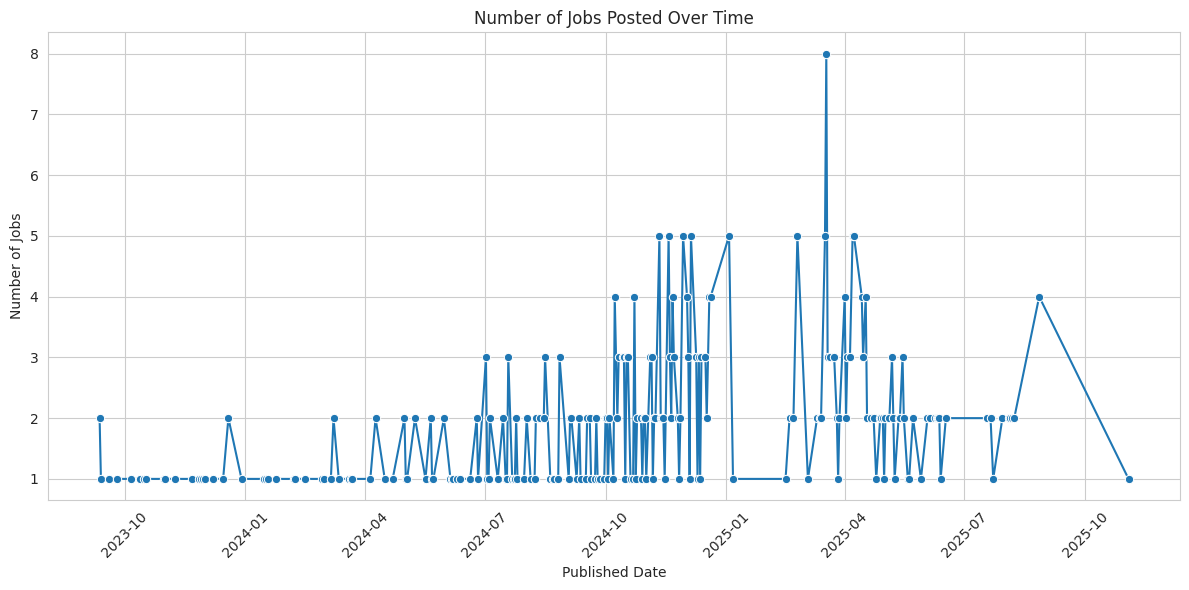

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Published Date' and count the number of jobs for each date
jobs_over_time = df.groupby('Published Date').size().reset_index(name='Number of Jobs')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Published Date', y='Number of Jobs', data=jobs_over_time, marker='o')
plt.title('Number of Jobs Posted Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/tmp/ipython-input-2087660338.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Published_Month_Year', y='Number of Jobs', data=jobs_per_month, palette='viridis')


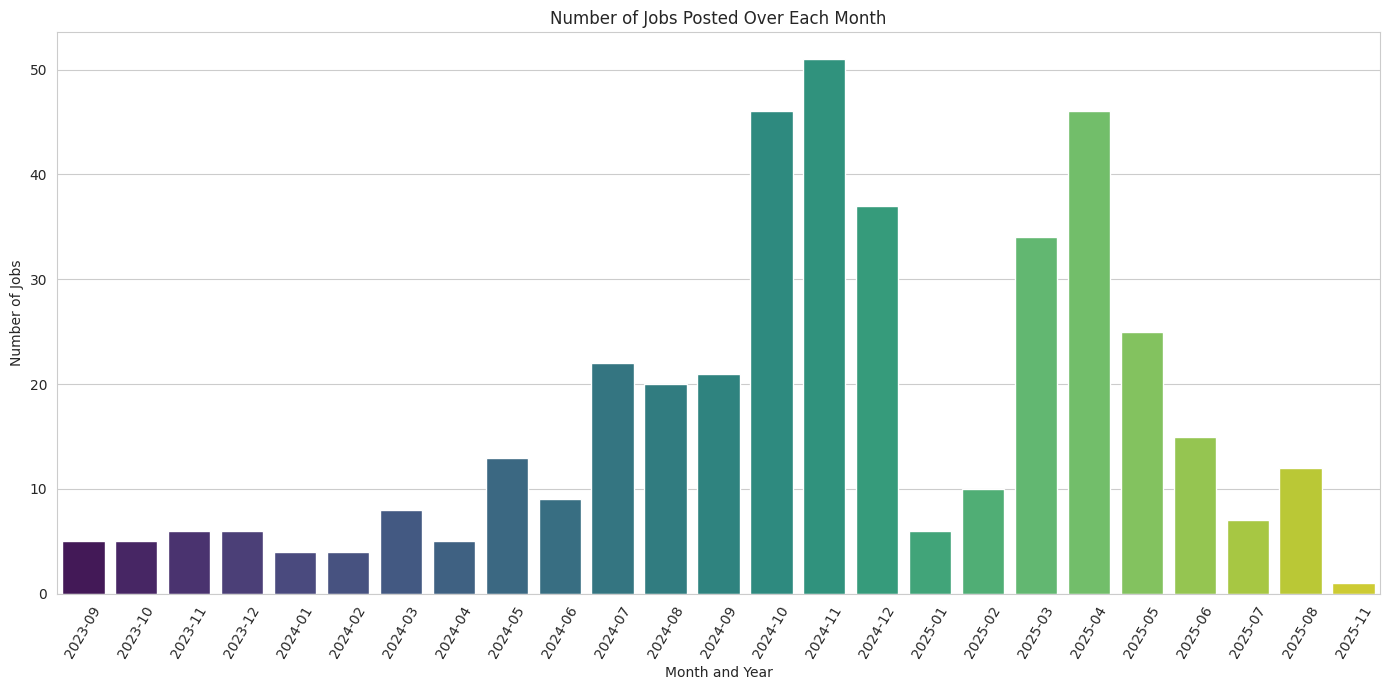

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year for grouping
df['Published_Month_Year'] = df['Published Date'].dt.to_period('M')

# Group by month and count the number of jobs
jobs_per_month = df.groupby('Published_Month_Year').size().reset_index(name='Number of Jobs')

# Convert 'Published_Month_Year' back to string for better plotting labels
jobs_per_month['Published_Month_Year'] = jobs_per_month['Published_Month_Year'].astype(str)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Published_Month_Year', y='Number of Jobs', data=jobs_per_month, palette='viridis')
plt.title('Number of Jobs Posted Over Each Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=60) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()